# Árbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/iris/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

([array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0., 

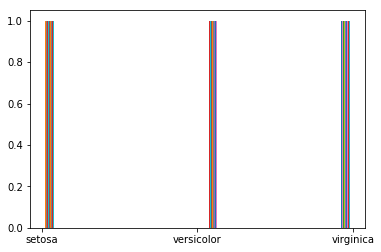

In [4]:
plt.hist(data.Species)

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]

target = colnames[4]

In [7]:
import numpy as np

In [8]:
data['is_train'] = np.random.uniform(0, 1, len(data)) <= 0.75

(array([  36.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  114.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

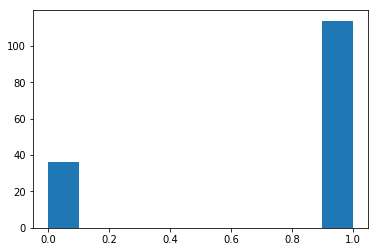

In [9]:
plt.hist(data.is_train)

In [10]:
train, test = data[data['is_train'] == True], data[data['is_train'] == False]

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 20, random_state = 99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [13]:
preds = tree.predict(test[predictors])

In [14]:
pd.crosstab(test[target], preds, rownames = ['Actual'], colnames = ['Prediction'])

Prediction,setosa,versicolor,virginica
Actual,,,
setosa,16,0,0
versicolor,0,10,2
virginica,0,1,7


## Visualización del árbol de decisión

In [15]:
from sklearn.tree import export_graphviz

In [16]:
with open('resources/iris_dtree.dot', 'w') as dotfile:
    export_graphviz(tree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

In [17]:
import os
from graphviz import Source

In [18]:
file = open('resources/iris_dtree.dot', 'r')
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.58\\nsamples = 114\\nvalue = [34, 38, 42]"] ;\n1 [label="entropy = 0.0\\nsamples = 34\\nvalue = [34, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 0.998\\nsamples = 80\\nvalue = [0, 38, 42]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.378\\nsamples = 41\\nvalue = [0, 38, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 37\\nvalue = [0, 37, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 39\\nvalue = [0, 0, 39]"] ;\n2 -> 6 ;\n}'

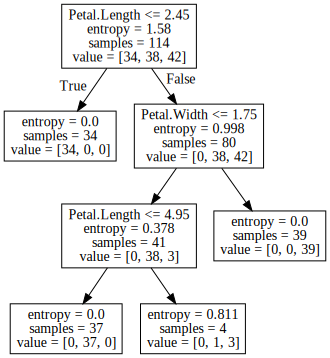

In [19]:
Source(text)

### Cross Validation para la poda

In [20]:
X = data[predictors]
Y = data[target]

In [21]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_impurity_split = 20, random_state = 99)
tree.fit(X, Y)

/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=20,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [22]:
from sklearn.cross_validation import KFold

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
cv = KFold(n = X.shape[0], n_folds = 10, shuffle = True, random_state = 1)

In [24]:
from sklearn.cross_validation import cross_val_score

In [25]:
scores = cross_val_score(tree, X, Y, scoring = 'accuracy', cv = cv, n_jobs = 1)
scores

/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/s

array([ 0.26666667,  0.13333333,  0.2       ,  0.2       ,  0.2       ,
        0.26666667,  0.2       ,  0.13333333,  0.06666667,  0.2       ])

In [26]:
score = np.mean(scores)
score

0.18666666666666668

In [27]:
for i in range(1, 11):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X, Y)
    cv = KFold(n=X.shape[0], n_folds=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring='accuracy', cv = cv, n_jobs=1)
    score = np.mean(scores)
    
    print('Score para i = ', i, ' es de: ', score)
    print('   ', tree.feature_importances_)

Score para i =  1  es de:  0.566666666667
    [ 0.  0.  1.  0.]
Score para i =  2  es de:  0.92
    [ 0.          0.          0.66620285  0.33379715]
Score para i =  3  es de:  0.94
    [ 0.          0.          0.68976981  0.31023019]
Score para i =  4  es de:  0.933333333333
    [ 0.          0.          0.66869158  0.33130842]
Score para i =  5  es de:  0.933333333333
    [ 0.          0.          0.66869158  0.33130842]
Score para i =  6  es de:  0.933333333333
    [ 0.          0.          0.66869158  0.33130842]
Score para i =  7  es de:  0.933333333333
    [ 0.          0.          0.66869158  0.33130842]
Score para i =  8  es de:  0.933333333333
    [ 0.          0.          0.66869158  0.33130842]
Score para i =  9  es de:  0.933333333333
    [ 0.          0.          0.66869158  0.33130842]
Score para i =  10  es de:  0.933333333333
    [ 0.          0.          0.66869158  0.33130842]


In [28]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
fores = RandomForestClassifier(n_jobs = 2, oob_score = True, n_estimators = 100)
fores.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [33]:
fores.oob_decision_function_

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.9787234 ,  0.0212766 ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.   

In [34]:
fores.oob_score_

0.95333333333333337